In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [8]:
num=df.select_dtypes(exclude='object')
obj=df.select_dtypes(include='object')

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


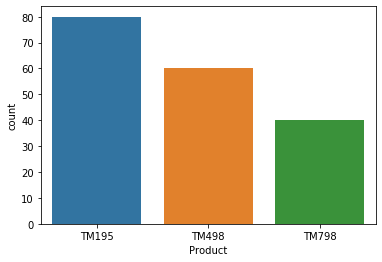

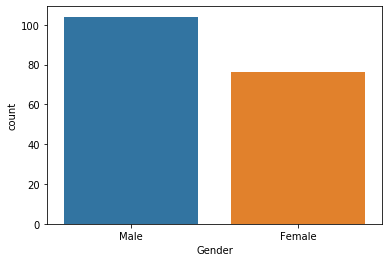

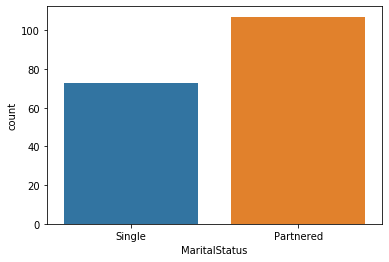

In [9]:
for i in obj:
    print(obj[i].value_counts())
    plt.figure()
    sns.countplot(obj[i])

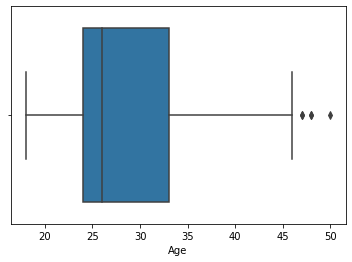

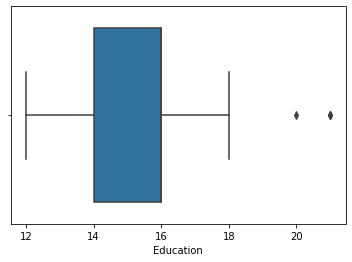

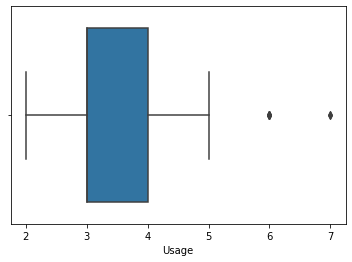

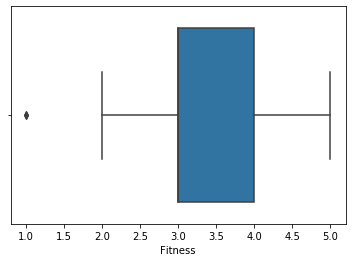

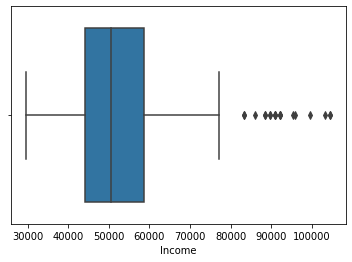

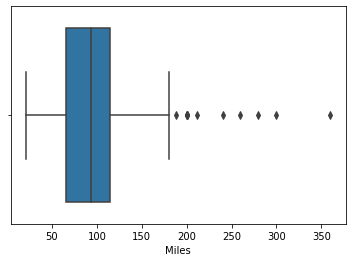

In [10]:
for i in num:
    plt.figure()
    sns.boxplot(df[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B66BCDBC8>,
      dtype=object)

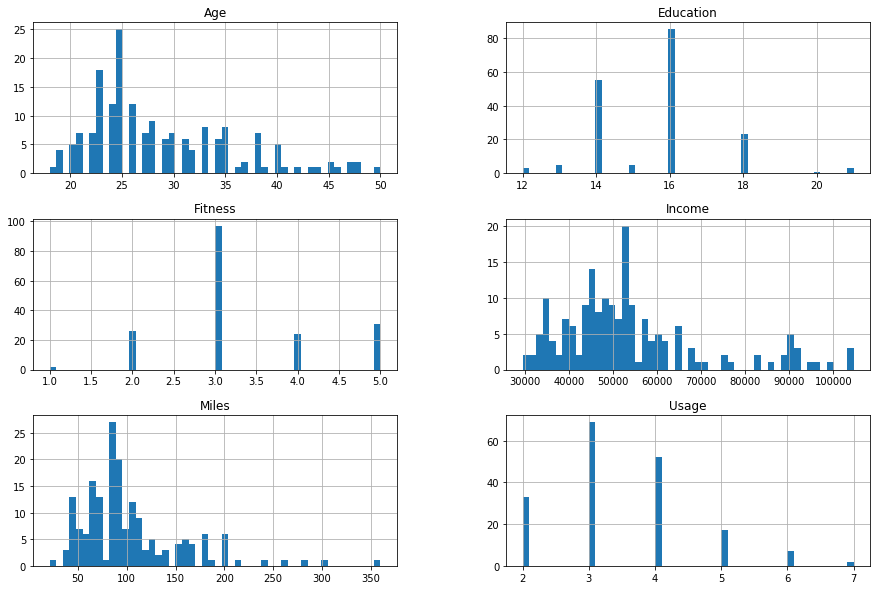

In [11]:
df.hist(bins=50,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B66D57748>,
      dtype=object)

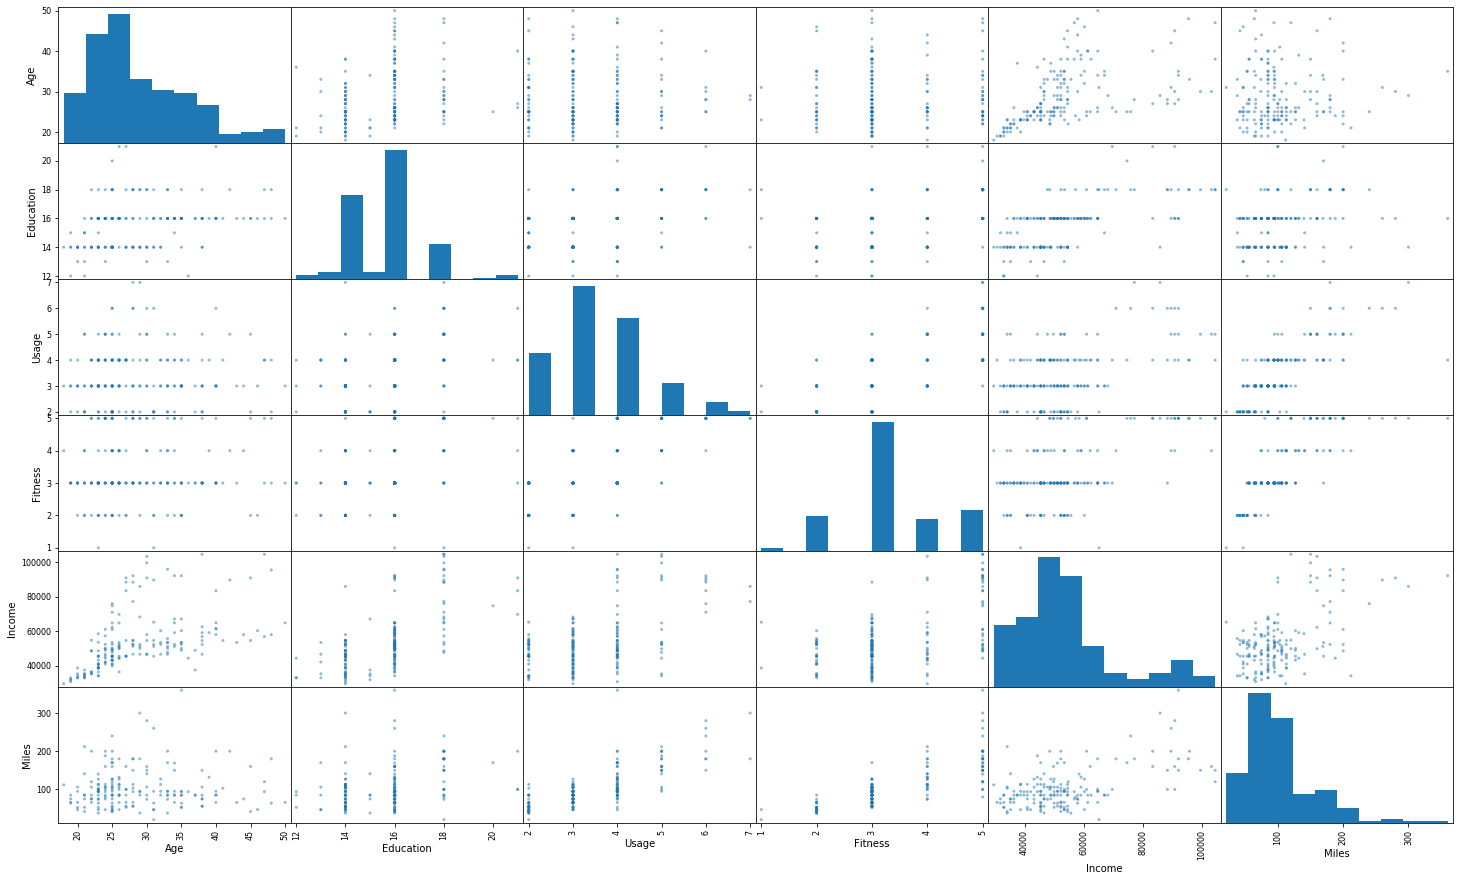

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(num,figsize=(25,15))

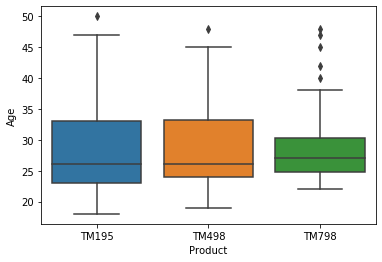

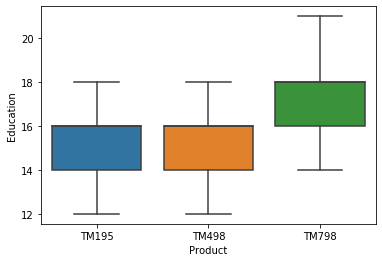

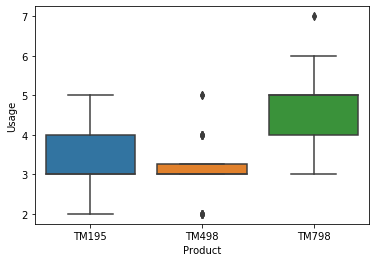

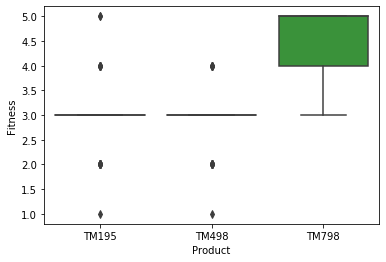

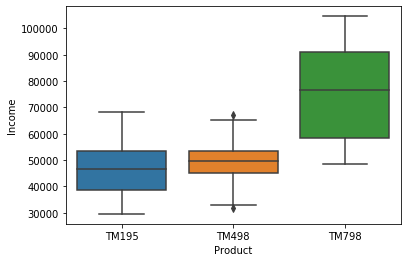

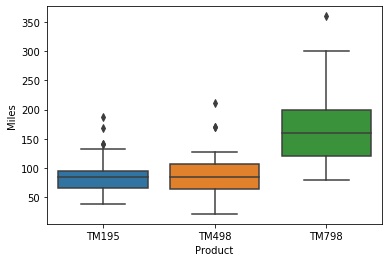

In [13]:
for i in num:
    plt.figure()
    sns.boxplot(x=df['Product'],y=df[i])

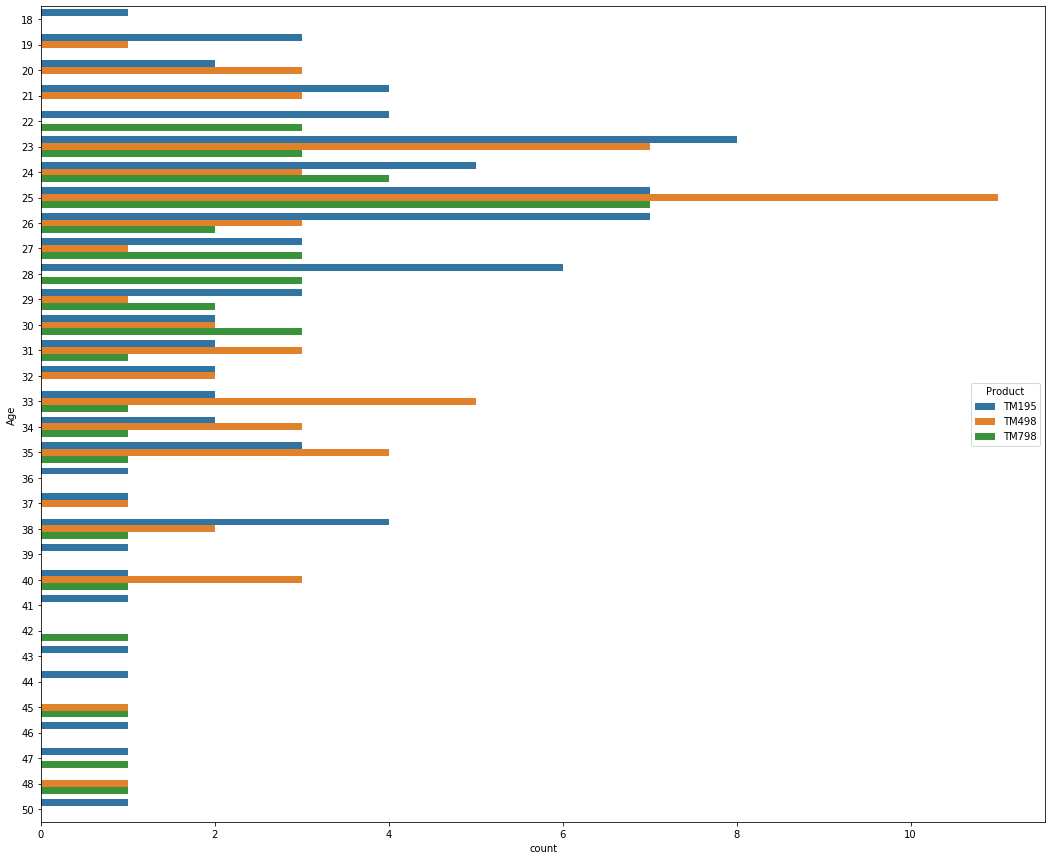

In [14]:
plt.figure(figsize=(18,15))
sns.countplot(y=df['Age'],hue=df['Product'])

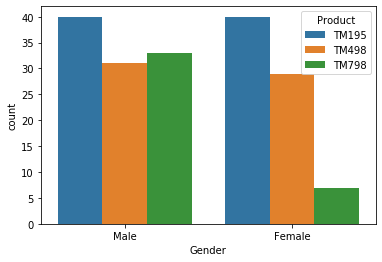

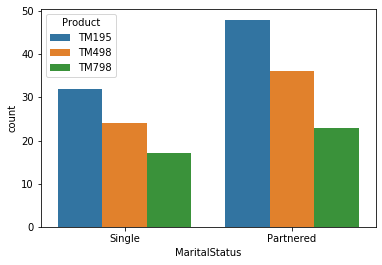

In [15]:
for i in obj.iloc[:,1:]:
    plt.figure()
    sns.countplot(hue=df['Product'],x=df[i])

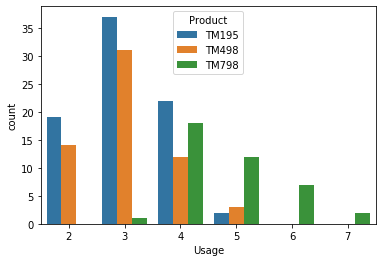

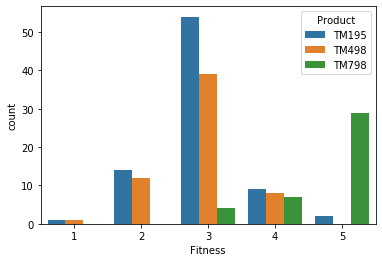

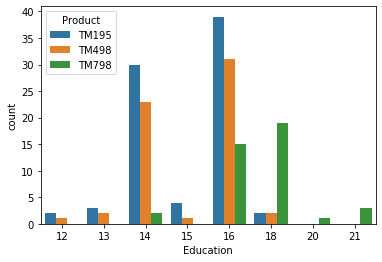

In [16]:
cat=num[['Usage','Fitness','Education']]
for i in cat:
    plt.figure()
    sns.countplot(x=df[i],hue=df['Product'])

In [17]:
from scipy import stats
z=np.abs(stats.zscore(num))
df=df[(z<3).all(axis=1)]

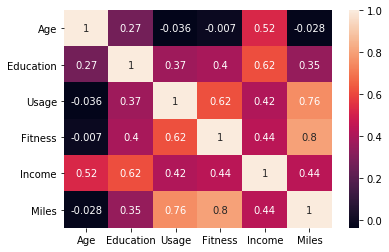

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
from vif import cal_vif
cal_vif(num)

,variables,VIF
0,Age,25.059016
1,Education,47.388173
2,Usage,29.318752
3,Fitness,37.521572
4,Income,27.965974
5,Miles,19.064594


In [21]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
for i in df.select_dtypes(include='object').iloc[:,1:]:
    df[i]=LabelEncoder().fit_transform(df[i])
df['Product']=LabelEncoder().fit_transform(df['Product'])

['Age' 'Gender' 'Education' 'MaritalStatus' 'Usage' 'Fitness' 'Income'
 'Miles'] [1.08453305e+00 4.26483402e+00 6.48719856e+00 7.44627169e-01
 1.63247940e+01 2.11677210e+01 2.41110840e+05 1.18160941e+03]
[7.44627169e-01 1.08453305e+00 4.26483402e+00 6.48719856e+00
 1.63247940e+01 2.11677210e+01 1.18160941e+03 2.41110840e+05]


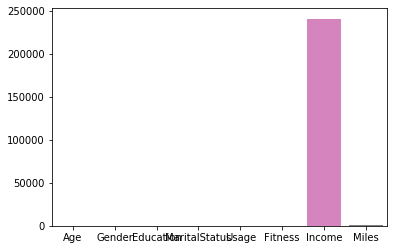

In [29]:
from sklearn.feature_selection import SelectKBest,chi2
result=SelectKBest(chi2,k='all').fit(df.iloc[:,1:],df.iloc[:,0])
print(np.array(df.columns)[1:],result.scores_)
sns.barplot(x=np.array(df.columns)[1:],y=result.scores_)
print(np.sort(result.scores_))

In [31]:
from sklearn.model_selection import train_test_split 
train,test=train_test_split(df,test_size=0.2,random_state=0,shuffle=True)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [42]:
lr=LogisticRegression(random_state=0)
rfe=RandomForestClassifier(n_estimators=100,random_state=0)
result=RFECV(lr,step=1,cv=4).fit(train.iloc[:,6:],train.iloc[:,0])
result.support_

array([ True, False,  True])

In [60]:
rfe.fit(train.iloc[:,5:],train.iloc[:,0])
rfe.score(train.iloc[:,5:],train.iloc[:,0])

0.9925373134328358

In [61]:
y_predict=rfe.predict(test.iloc[:,5:])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,test.iloc[:,0])

0.6470588235294118